<a href="https://colab.research.google.com/github/daniel-freitas48/AtividadeSSD/blob/main/Atividade_SSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP - Sistemas de Suporte à Decisão**

# Definição do Problema

**Objetivo:** prever se um cliente terá alta satisfação ao consumir no restaurante.

Essa análise poderá auxiliar na gestão da experiência do cliente e tomada de decisões dos gerentes e sócio do restaurante.

Base de dadas utilizada: Predict Restaurant Customer Satisfaction, à partir do Kaggle

Base disponível em: https://www.kaggle.com/datasets/rabieelkharoua/predict-restaurant-customer-satisfaction-dataset/code

# 1. Preparação do Ambiente






# 1.1 Carregando as Bibliotecas


In [ ]:
#Bibliotecas padrões que serão utilizadas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Para a aplicação de Machine Learning

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

#definindo melhor formatação para os gráficos

pd.set_option("display.max_columns", 100)
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")
plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")


# 2. Carregando os Dados


In [ ]:
# Fazer upload da base a ser utilizada

dados = pd.read_csv("/content/drive/MyDrive/restaurant_customer_satisfaction.csv")

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            1500 non-null   int64  
 1   Age                   1500 non-null   int64  
 2   Gender                1500 non-null   object 
 3   Income                1500 non-null   int64  
 4   VisitFrequency        1500 non-null   object 
 5   AverageSpend          1500 non-null   float64
 6   PreferredCuisine      1500 non-null   object 
 7   TimeOfVisit           1500 non-null   object 
 8   GroupSize             1500 non-null   int64  
 9   DiningOccasion        1500 non-null   object 
 10  MealType              1500 non-null   object 
 11  OnlineReservation     1500 non-null   int64  
 12  DeliveryOrder         1500 non-null   int64  
 13  LoyaltyProgramMember  1500 non-null   int64  
 14  WaitTime              1500 non-null   float64
 15  ServiceRating        

In [ ]:
dados.head()

,CustomerID,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
0,654,35,Male,83380,Weekly,27.83,Chinese,Breakfast,3,Business,Takeaway,0,1,1,43.52,2,5,4,0
1,655,19,Male,43623,Rarely,115.41,American,Dinner,1,Casual,Dine-in,0,0,0,57.52,5,5,3,0
2,656,41,Female,83737,Weekly,106.69,American,Dinner,6,Celebration,Dine-in,0,1,0,48.68,3,4,5,0
3,657,43,Male,96768,Rarely,43.51,Indian,Lunch,1,Celebration,Dine-in,0,0,0,7.55,4,5,1,0
4,658,55,Female,67937,Monthly,148.08,Chinese,Breakfast,1,Business,Takeaway,0,0,1,37.79,2,3,5,0


In [ ]:
dados.describe(include='all')

,CustomerID,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
count,"1,500.00","1,500.00",1500,"1,500.00",1500,"1,500.00",1500,1500,"1,500.00",1500,1500,"1,500.00","1,500.00","1,500.00","1,500.00","1,500.00","1,500.00","1,500.00","1,500.00"
unique,NaN,NaN,2,NaN,4,NaN,5,3,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Female,NaN,Weekly,NaN,Italian,Breakfast,NaN,Celebration,Dine-in,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,759,NaN,606,NaN,325,506,NaN,519,751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,"1,403.50",43.83,NaN,"85,921.89",NaN,105.66,NaN,NaN,5.04,NaN,NaN,0.30,0.41,0.48,30.16,3.04,3.00,2.99,0.13
std,433.16,14.97,NaN,"38,183.05",NaN,52.38,NaN,NaN,2.56,NaN,NaN,0.46,0.49,0.50,17.21,1.42,1.42,1.45,0.34
min,654.00,18.00,NaN,"20,012.00",NaN,10.31,NaN,NaN,1.00,NaN,NaN,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00
25%,"1,028.75",31.75,NaN,"52,444.00",NaN,62.29,NaN,NaN,3.00,NaN,NaN,0.00,0.00,0.00,15.24,2.00,2.00,2.00,0.00
50%,"1,403.50",44.00,NaN,"85,811.00",NaN,104.63,NaN,NaN,5.00,NaN,NaN,0.00,0.00,0.00,30.04,3.00,3.00,3.00,0.00
75%,"1,778.25",57.00,NaN,"119,159.25",NaN,148.65,NaN,NaN,7.00,NaN,NaN,1.00,1.00,1.00,45.29,4.00,4.00,4.00,0.00


In [ ]:
for col in dados.columns:
    print(f"{col}: {dados[col].nunique()} valores únicos")

CustomerID: 1500 valores únicos
Age: 52 valores únicos
Gender: 2 valores únicos
Income: 1486 valores únicos
VisitFrequency: 4 valores únicos
AverageSpend: 1500 valores únicos
PreferredCuisine: 5 valores únicos
TimeOfVisit: 3 valores únicos
GroupSize: 9 valores únicos
DiningOccasion: 3 valores únicos
MealType: 2 valores únicos
OnlineReservation: 2 valores únicos
DeliveryOrder: 2 valores únicos
LoyaltyProgramMember: 2 valores únicos
WaitTime: 1500 valores únicos
ServiceRating: 5 valores únicos
FoodRating: 5 valores únicos
AmbianceRating: 5 valores únicos
HighSatisfaction: 2 valores únicos


# 3. Análise inicial

Nessa etapa será feita uma análise inicial, para compreender melhor a base de dados antes de aplicar modelos específicos.


Para isso, vou explorar algumas perguntas como?

- Qual é a distribuição de idade e renda dos clientes?
- Há equilíbrio entre gêneros?
- Quais são as frequências de visita mais comuns?
- Qual é a proporção de clientes altamente satisfeitos?
- Como estão distribuídas as avaliações (serviço, comida, ambiente)?

## Distribuição de variáveis numéricas


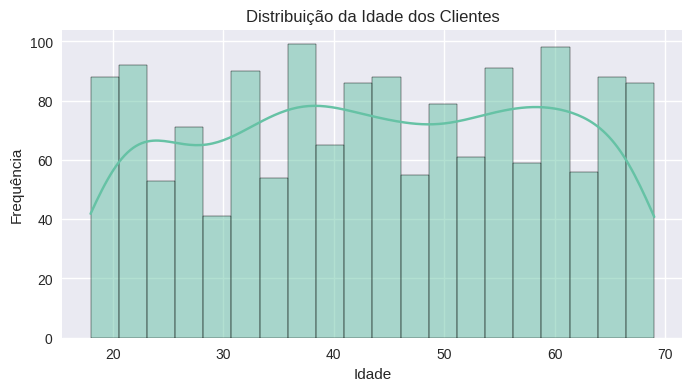

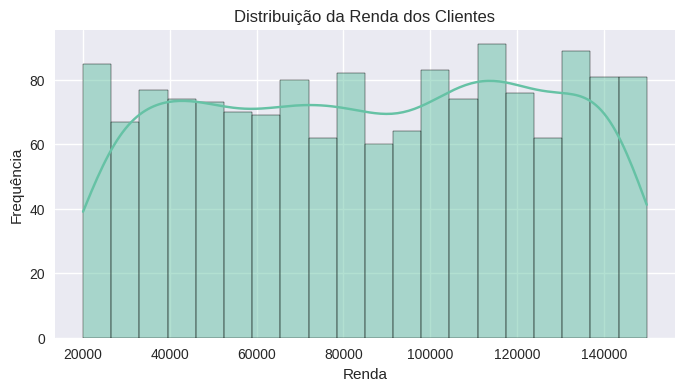

In [ ]:
#Gráfico 1: Histograma de Idade
plt.figure(figsize=(8,4))
sns.histplot(dados["Age"], bins=20, kde=True)
plt.title("Distribuição da Idade dos Clientes")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()

#Gráfico 2: Histograma de Renda
plt.figure(figsize=(8,4))
sns.histplot(dados["Income"], bins=20, kde=True)
plt.title("Distribuição da Renda dos Clientes")
plt.xlabel("Renda")
plt.ylabel("Frequência")
plt.show()


## Variáveis categóricas


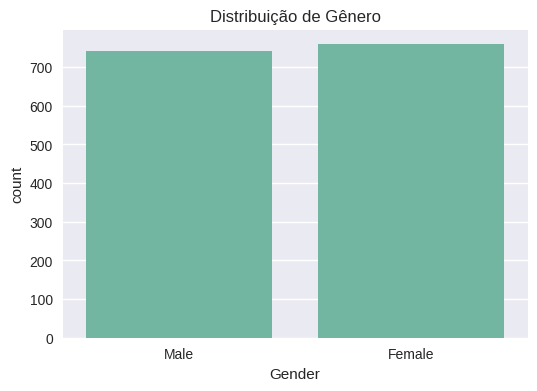

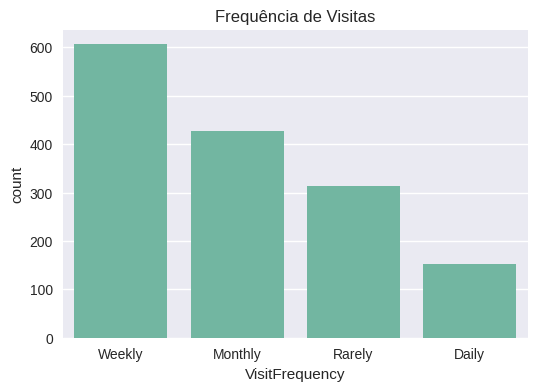

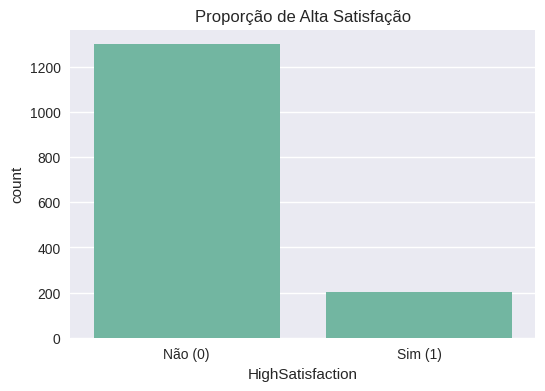

In [ ]:
# Gênero

plt.figure(figsize=(6,4))
sns.countplot(x="Gender", data=dados)
plt.title("Distribuição de Gênero")
plt.show()

# Frequência de visitas

plt.figure(figsize=(6,4))
sns.countplot(x="VisitFrequency", data=dados,
              order=dados["VisitFrequency"].value_counts().index)
plt.title("Frequência de Visitas")
plt.show()

# Alta satisfação

plt.figure(figsize=(6,4))
sns.countplot(x="HighSatisfaction", data=dados)
plt.title("Proporção de Alta Satisfação")
plt.xticks([0,1], ["Não (0)", "Sim (1)"])
plt.show()


## Variáveis de avaliação


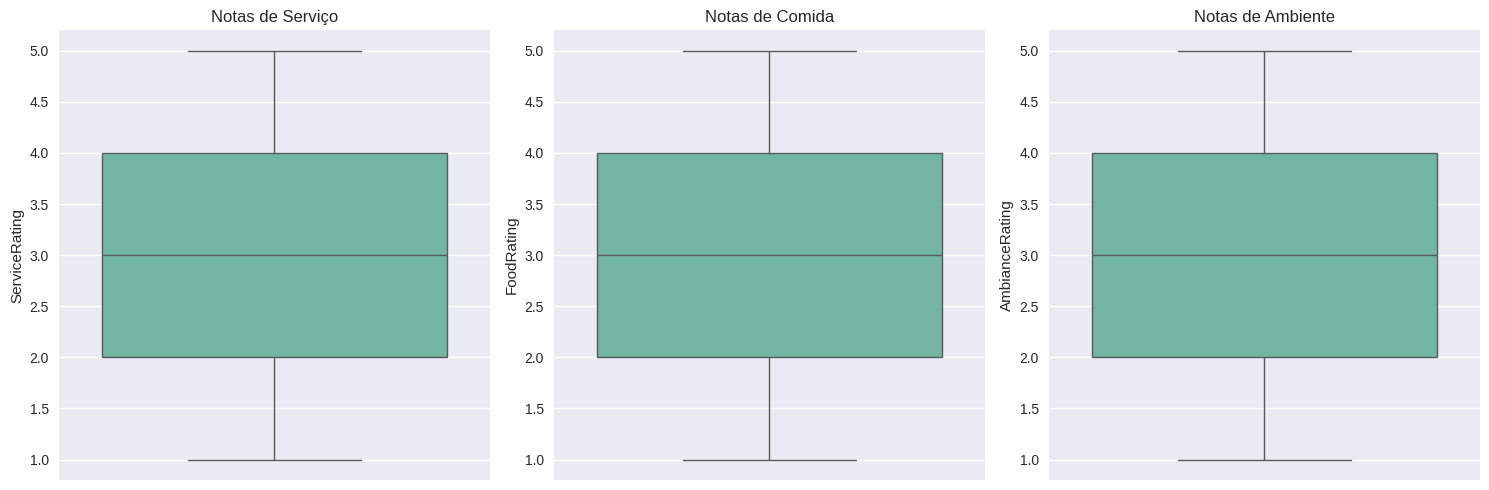

In [ ]:
#Boxplots para ver notas de avaliação

fig, axes = plt.subplots(1, 3, figsize=(15,5))

sns.boxplot(y="ServiceRating", data=dados, ax=axes[0])
axes[0].set_title("Notas de Serviço")

sns.boxplot(y="FoodRating", data=dados, ax=axes[1])
axes[1].set_title("Notas de Comida")

sns.boxplot(y="AmbianceRating", data=dados, ax=axes[2])
axes[2].set_title("Notas de Ambiente")

plt.tight_layout()
plt.show()


# 4. Limpeza e preparação

Verificar a existência de valores nulos

In [ ]:
# Contagem de valores nulos por coluna
dados.isnull().sum()


,0
CustomerID,0
Age,0
Gender,0
Income,0
VisitFrequency,0
AverageSpend,0
PreferredCuisine,0
TimeOfVisit,0
GroupSize,0
DiningOccasion,0


Separar as variáveis

In [ ]:
# Variável alvo (target)

y = dados["HighSatisfaction"]

# Variáveis preditoras (features) = todas menos a target

X = dados.drop(columns=["HighSatisfaction"])

# Visualizar as primeiras linhas

X.head()


,CustomerID,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating
0,654,35,Male,83380,Weekly,27.83,Chinese,Breakfast,3,Business,Takeaway,0,1,1,43.52,2,5,4
1,655,19,Male,43623,Rarely,115.41,American,Dinner,1,Casual,Dine-in,0,0,0,57.52,5,5,3
2,656,41,Female,83737,Weekly,106.69,American,Dinner,6,Celebration,Dine-in,0,1,0,48.68,3,4,5
3,657,43,Male,96768,Rarely,43.51,Indian,Lunch,1,Celebration,Dine-in,0,0,0,7.55,4,5,1
4,658,55,Female,67937,Monthly,148.08,Chinese,Breakfast,1,Business,Takeaway,0,0,1,37.79,2,3,5


Identificar quais são as variáveis categóricas e numéricas

In [ ]:
# Selecionar variáveis categóricas (tipo object) e numéricas

cat_features = X.select_dtypes(include=["object"]).columns.tolist()
num_features = X.select_dtypes(include=["int64","float64"]).columns.tolist()

print("Variáveis categóricas:", cat_features)
print("Variáveis numéricas:", num_features)



Variáveis categóricas: ['Gender', 'VisitFrequency', 'PreferredCuisine', 'TimeOfVisit', 'DiningOccasion', 'MealType']
Variáveis numéricas: ['CustomerID', 'Age', 'Income', 'AverageSpend', 'GroupSize', 'OnlineReservation', 'DeliveryOrder', 'LoyaltyProgramMember', 'WaitTime', 'ServiceRating', 'FoodRating', 'AmbianceRating']


Pré processador

Deixar todos os dados em formato numérico e comparável.

Escalonar (StandardScaler): colocar variáveis numéricas na mesma escala.

One-Hot Encoding: transformar categorias em colunas binárias.

Entender e colocar todas as variáveis igualmente.


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Pré-processamento:

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
    ]
)


Dividir Treino e Teste

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir os dados 70-30 (70% treino, 30% teste)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Tamanho treino:", X_train.shape)
print("Tamanho teste :", X_test.shape)


Tamanho treino: (1050, 18)
Tamanho teste : (450, 18)



## 5. Modelagem Baseline


O baseline será o ponto de partida para permitir comparar modelos mais complexos depois.

- **Problema**: Classificação binária → prever se o cliente terá alta satisfação (highsatisfaction = 1) ou não (= 0).  

- **Modelo escolhido para o baseline**: Regressão Logística.  
  - Motivo: simples, rápido de treinar e interpretar.  
  - Indicado para classificação binária.  

- **Métrica principal**:
  - Accuracy: percentual de acertos gerais.  
  - ROC-AUC:  mede a capacidade de distinguir entre as classes.  


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Criar o pipeline a partir do pré-processamento + modelo

modelo_baseline = Pipeline(steps=[
    ("preprocessamento", preprocessor),
    ("classificador", LogisticRegression(max_iter=1000, random_state=42))
])

# Treinando o modelo

modelo_baseline.fit(X_train, y_train)

# Fazendo previsões

y_pred = modelo_baseline.predict(X_test)
y_prob = modelo_baseline.predict_proba(X_test)[:,1]

# Avaliando desempenho

print("Avaliação do Modelo Baseline (Regressão Logística)")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("ROC-AUC :", round(roc_auc_score(y_test, y_prob), 3))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Avaliação do Modelo Baseline (Regressão Logística)
Accuracy: 0.864
ROC-AUC : 0.838

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       390
           1       0.49      0.43      0.46        60

    accuracy                           0.86       450
   macro avg       0.70      0.68      0.69       450
weighted avg       0.86      0.86      0.86       450



Resultados do Modelo Baseline

O modelo baseline de Regressão Logística apresentou uma accuracy de 86,4% e uma área sob a curva ROC (ROC-AUC) de 0,838, o que indica boa capacidade de distinção entre clientes satisfeitos e não satisfeitos.



Entretanto, ao analisar o relatório de classificação, percebe-se um desempenho desigual entre as classes:
- Para a classe 0 (não satisfeito), o modelo obteve precisão (0,91) e recall (0,93) elevados, mostrando que consegue identificar bem esses clientes.
- Já para a classe 1 (satisfeito), o desempenho foi mais baixo, com precisão de 0,49 e recall de apenas 0,43, resultando em um F1-score de 0,46.



Esse comportamento sugere que o modelo está influenciado pelo desbalanceamento da base, na qual há uma quantidade significativamente maior de clientes não satisfeitos em relação aos satisfeitos. Assim, embora o resultado geral seja positivo, o modelo ainda não é eficaz para identificar clientes com alta satisfação.



#6. Modelos mais robustos e balanceamento

Após o baseline com Regressão Logística, o modelo teve bom desempenho geral, mas dificuldade em prever a classe minoritária (clientes satisfeitos).  
Para melhorar, serão aplicadas duas estratégias:

1. Ajuste de pesos da classe: usando class_weight="balanced", que dá mais importância para a classe minoritária durante o treino.  
2. Testar modelos mais robustos, serão utilizados:
   - Random Forest: modelo de árvores em conjunto, captura relações não lineares e lida bem com variáveis categóricas.
   - Gradient Boosting: modelo sequencial que otimiza erros do anterior.

Métricas principais:
- Accuracy  
- ROC-AUC  
- F1-score da classe 1 (satisfeitos): métrica mais crítica neste problema.


Regressão logística com pesos balanceados

In [ ]:
modelo_lr_bal = Pipeline(steps=[
    ("preprocessamento", preprocessor),
    ("classificador", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42))
])

modelo_lr_bal.fit(X_train, y_train)
y_pred_lr = modelo_lr_bal.predict(X_test)
y_prob_lr = modelo_lr_bal.predict_proba(X_test)[:,1]

print("Regressão Logística Balanceada")
print("Accuracy:", round(accuracy_score(y_test, y_pred_lr), 3))
print("ROC-AUC :", round(roc_auc_score(y_test, y_prob_lr), 3))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_lr))


Regressão Logística Balanceada
Accuracy: 0.771
ROC-AUC : 0.833

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.95      0.78      0.85       390
           1       0.34      0.73      0.46        60

    accuracy                           0.77       450
   macro avg       0.64      0.76      0.66       450
weighted avg       0.87      0.77      0.80       450



Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = Pipeline(steps=[
    ("preprocessamento", preprocessor),
    ("classificador", RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        class_weight="balanced",
        random_state=42
    ))
])

modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)
y_prob_rf = modelo_rf.predict_proba(X_test)[:,1]

print("Random Forest")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 3))
print("ROC-AUC :", round(roc_auc_score(y_test, y_prob_rf), 3))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_rf))


Random Forest
Accuracy: 0.871
ROC-AUC : 0.919

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       390
           1       1.00      0.03      0.06        60

    accuracy                           0.87       450
   macro avg       0.94      0.52      0.50       450
weighted avg       0.89      0.87      0.82       450



Gradient Boosting

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

modelo_gb = Pipeline(steps=[
    ("preprocessamento", preprocessor),
    ("classificador", HistGradientBoostingClassifier(random_state=42))
])

modelo_gb.fit(X_train, y_train)
y_pred_gb = modelo_gb.predict(X_test)
y_prob_gb = modelo_gb.predict_proba(X_test)[:,1]

print("Gradient Boosting (HistGradientBoostingClassifier)")
print("Accuracy:", round(accuracy_score(y_test, y_pred_gb), 3))
print("ROC-AUC :", round(roc_auc_score(y_test, y_prob_gb), 3))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting (HistGradientBoostingClassifier)
Accuracy: 0.889
ROC-AUC : 0.906

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       390
           1       0.65      0.37      0.47        60

    accuracy                           0.89       450
   macro avg       0.78      0.67      0.70       450
weighted avg       0.87      0.89      0.88       450



# 7. Comparação de Resultados

Com base nos resultados obtidos pelos três modelos testados, foi possível construir uma visão comparativa das métricas de desempenho.

- **Regressão Logística Balanceada**: apresentou uma **redução na accuracy (0,77)** em relação ao baseline, mas compensou com um recall elevado para a classe 1 (0,73). Isso significa que o modelo consegue identificar a maior parte dos clientes satisfeitos, mesmo que com muitos falsos positivos. É útil em contextos onde é mais importante **não perder clientes satisfeitos** do que classificar todos corretamente.

- **Random Forest**: obteve a **maior ROC-AUC (0,919) e uma alta accuracy (0,87)**, mas praticamente não conseguiu identificar a classe 1 (recall = 0,03). Isso indica que o modelo ficou enviesado para a classe majoritária (clientes insatisfeitos), sendo pouco útil para o problema em questão.

- **Gradient Boosting**: alcançou o **melhor equilíbrio** entre performance global e foco na classe minoritária. Com **accuracy de 0,889, ROC-AUC de 0,906 e F1-score da classe 1 de 0,47**, o modelo demonstrou capacidade de identificar parte relevante dos clientes satisfeitos, sem comprometer fortemente a precisão geral.

Parcialmente, é possível concluir que o modelo de **Gradient Boosting** se mostrou a melhor escolha neste estágio, pois equilibra adequadamente os acertos da classe majoritária e da minoritária. Já a Regressão Logística Balanceada pode ser útil caso o objetivo seja maximizar o recall da classe 1 (evitar deixar clientes satisfeitos de fora). O Random Forest, apesar da alta acurácia, não se mostrou adequado devido ao baixo desempenho na detecção de clientes satisfeitos.


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Colletar métricas focadas na classe 1 (clientes altamente satisfeito)

def coletar_metricas(nome, y_true, y_pred, y_prob):
    return {
        "Modelo": nome,
        "Accuracy": round(accuracy_score(y_true, y_pred), 3),
        "ROC-AUC": round(roc_auc_score(y_true, y_prob), 3),
        "Precision (Classe 1)": round(precision_score(y_true, y_pred, pos_label=1), 3),
        "Recall (Classe 1)": round(recall_score(y_true, y_pred, pos_label=1), 3),
        "F1-score (Classe 1)": round(f1_score(y_true, y_pred, pos_label=1), 3)
    }

# Métricas de cada modelo

resultados = []
resultados.append(coletar_metricas("Logística Balanceada", y_test, y_pred_lr, y_prob_lr))
resultados.append(coletar_metricas("Random Forest", y_test, y_pred_rf, y_prob_rf))
resultados.append(coletar_metricas("Gradient Boosting", y_test, y_pred_gb, y_prob_gb))

# Criar DataFrame comparativo

dados_resultados = pd.DataFrame(resultados)
dados_resultados


,Modelo,Accuracy,ROC-AUC,Precision (Classe 1),Recall (Classe 1),F1-score (Classe 1)
0,Logística Balanceada,0.77,0.83,0.34,0.73,0.46
1,Random Forest,0.87,0.92,1.00,0.03,0.07
2,Gradient Boosting,0.89,0.91,0.65,0.37,0.47


# 8. Importância das vartiáveis

O próximo passo é interpretar os resultados, entendendo **quais variáveis mais influenciam a satisfação do cliente**.

Isso é essencial em Machine Learning, pois:
- Ajuda a explicar o modelo.
- Permite extrair insights de negócio

Será utilizado o modelo de **Gradient Boosting**, que apresentou o melhor equilíbrio entre acurácia e detecção da classe minoritária, para analisar a importância das variáveis.


In [ ]:
from sklearn.inspection import permutation_importance

# Calcular importância por permutação no conjunto de teste

resultado_importancias = permutation_importance(
    modelo_gb_feat, X_test_transf, y_test, n_repeats=10, random_state=42, n_jobs=-1
)

# Organizar resultados em DataFrame

dados_importancias = pd.DataFrame({
    "Variável": all_features,
    "Importância": resultado_importancias.importances_mean
}).sort_values(by="Importância", ascending=False)

# Variáveis mais importantes

dados_importancias.head(15)


,Variável,Importância
10,foodrating,0.02
5,onlinereservation,0.02
7,loyaltyprogrammember,0.01
3,averagespend,0.01
2,income,0.01
9,servicerating,0.01
8,waittime,0.01
29,mealtype_Dine-in,0.01
17,visitfrequency_Weekly,0.01
28,diningoccasion_Celebration,0.01


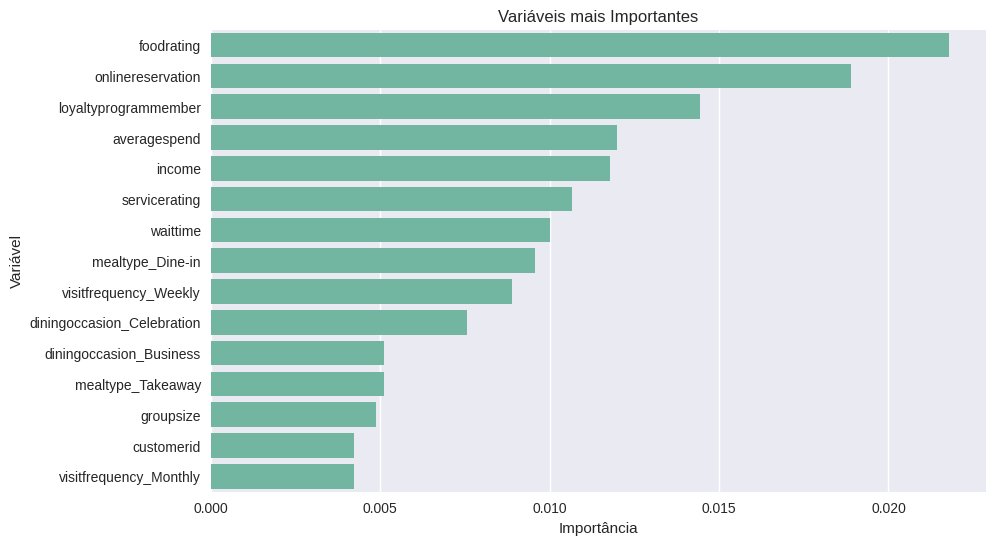

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x="Importância", y="Variável", data=dados_importancias.head(15))
plt.title("Variáveis mais Importantes")
plt.show()


**Interpretação do Gráfico de Importância das Variáveis**

O gráfico acima mostra as 15 variáveis que mais influenciam a previsão de alta satisfação dos clientes segundo o modelo de Gradient Boosting.  

Observa-se que fatores como **avaliação da comida (foodrating)** e o uso de **reserva online (onlinereservation)** aparecem como os principais determinantes. Além disso, elementos ligados ao programa de fidelidade (loyaltyprogrammember) também possui relevância.

É importante notar que os valores de importância são próximos entre si (em torno de 0,01 a 0,02). Isso ocorre porque a satisfação do cliente não depende de um único fator isolado, mas sim de uma **combinação de aspectos** relacionados à experiência no restaurante. Em outras palavras, o modelo distribui o peso entre várias variáveis, indicando que todas elas, em conjunto, contribuem para explicar o nível de satisfação.

De forma prática, os resultados reforçam que:
- A **qualidade da comida** é prioridade central.  
- **Facilidades tecnológicas**, como reservas online, agregam valor à experiência.  
- Clientes engajados (programa de fidelidade, visitas frequentes, ocasiões especiais) tendem a apresentar padrões de satisfação diferenciados.  
- Aspectos como **tempo de espera** e **atendimento** também contribuem, embora em menor grau.

Assim, o restaurante deve considerar esses fatores de forma integrada para compreender e melhorar a experiência dos clientes.


## 9. Conclusão e Recomendações

Neste estudo, foi realizada uma análise preditiva para identificar os principais fatores que influenciam a satisfação de clientes no restaurante específico. O processo envolveu:

1. **Exploração inicial dos dados**: identificação da distribuição das notas e avaliação da consistência da base.  
2. **Modelagem baseline**:  Regressão Logística como ponto de partida, alcançando boa acurácia geral, mas com dificuldade em prever clientes altamente satisfeitos (classe 1).  
3. **Modelos mais robustos**: Random Forest e Gradient Boosting, incluindo estratégias para lidar com o desbalanceamento da base.  
   - O **Random Forest** apresentou alta acurácia, mas praticamente não conseguiu prever clientes satisfeitos.  
   - A **Regressão Logística Balanceada** aumentou o recall da classe 1, mas reduziu a precisão.  
   - O **Gradient Boosting** demonstrou o melhor equilíbrio entre desempenho global e capacidade de identificar a classe minoritária, sendo considerado o modelo mais adequado neste cenário.  
4. **Interpretação dos resultados**: a análise de importância das variáveis mostrou que fatores como **qualidade da comida, reservas online e programas de fidelidade** são os 3 principais determinantes da satisfação.

### Recomendações práticas
- **Priorizar a qualidade da comida**: principal fator associado à alta satisfação.  
- **Facilitar o acesso digital**: investimentos em reservas online e programas de fidelidade aumentam o engajamento.  
- **Atender ocasiões especiais**: personalizar a experiência de clientes em celebrações pode gerar impacto positivo significativo.  
- **Gerenciar tempo de espera e atendimento**: embora não sejam os fatores mais fortes, contribuem para a percepção geral de qualidade.  

### Limitações e próximos passos
- A base de dados apresenta **desbalanceamento de classes**, o que influencia os resultados.
- Poderiam ser testados modelos adicionais e ajustados hiperparâmetros para maximizar a performance.  
- Estudos futuros também podem incluir variáveis contextuais (ex.: sazonalidade, localização) para aumentar a robustez das previsões.  

**Conclusão final**: o modelo de **Gradient Boosting** apresentou melhor desempenho global e destacou os fatores centrais para a satisfação dos clientes, fornecendo insumos valiosos para decisões estratégicas no setor de restaurantes.
